# **Convolutional Neural Network**

The following code utilizes the extracted spectrograms and melgrams from audio files and the [TensorFlow](https://github.com/tensorflow/tensorflow) library to set up and train the CNN model.

Using CNNs for audio classification is a popular and effective approach due to several reasons such as:

* **Local Feature Extraction**: CNNs use convolutional layers to automatically learn and extract local patterns from audio signals.
* **Handling Spatial Relationships**: When audio signals are transformed into spectrograms (time-frequency representations), the spatial relationships between the time and frequency components become crucial. CNNs are particularly good at learning these spatial relationships due to their ability to capture local dependencies through convolutional operations.

> When applied to the test set, the model achieves an **accuracy** of **80.8%** and an **F1** (macro) **score** of **81.2%**, with 2.0-second segmentation and a batch size of 16.



## 1. Mount the Google Drive to the Colab environment

In [ ]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/'
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1oJSL58N419Ve8pd0wCvgXEy52hLM2tJN/MarineMammalSoundClassification


## 2. Import the necessary libraries and scripts

In [ ]:
import os
import numpy as np
import pickle
from utils.models_functions import load_data, create_CNN_model, train_model, evaluate_model, save_model, load_model
from utils.display import display_model_evaluation
from utils.utilities import ensure_dir

## 3. Train and Εvaluate the Model

The architecture we chose for our model is the following:

1. **Conv2D Layer**: 32 filters of size 3x3 with ReLU activation, processing the input shape.
2. **MaxPooling2D Layer**: Reduces spatial dimensions by a factor of 2 using a 2x2 window.
3. **Dropout Layer**: Sets 10% of input units to 0 to prevent overfitting.
4. **Conv2D Layer**: 64 filters of size 3x3 with ReLU activation.
5. **MaxPooling2D Layer**: Further reduces spatial dimensions by a factor of 2 using a 2x2 window.
6. **Dropout Layer**: Sets 10% of input units to 0.
7. **Conv2D Layer**: 128 filters of size 3x3 with ReLU activation.
8. **MaxPooling2D Layer**: Further reduces spatial dimensions by a factor of 2 using a 2x2 window.
9. **Dropout Layer**: Sets 10% of input units to 0.
10. **Flatten Layer**: Converts the 2D matrix into a 1D vector.
11. **Fully Connected (Dense) Layer**: 128 units with ReLU activation.
12. **Dropout Layer**: Sets 10% of input units to 0.
13. **Output Layer**: num_classes units with softmax activation for classification.
14. **Model Compilation**: Uses Adam optimizer, categorical cross-entropy loss, and accuracy metric.


To determine the optimal combination of parameters for our project, we experimented with various configurations, including:

1. wav files segmentation: 1.0, 2.0 and 5.0 secs
2. Spectrograms or Mel-spectrograms: specs or mels
3. Number of epochs: 60 or 80
4. Batch size: 16, 32 and 64

In [ ]:
def process_pipeline(model_name, specs_or_mels, seg_secs, epochs=40, batch_size=64, patience=5):
    """
    Performs the entire pipeline of processing, training, evaluating, and saving a neural network model.

    Args:
    model_name (str): The name to be used for saving the model and HTML output.
    specs_or_mels (str): Specifies whether to use spectrograms or mel spectrograms.
    seg_secs (int): The segment duration in seconds for which data is prepared.
    epochs (int, optional): The number of epochs to train the model. Defaults to 40.
    batch_size (int, optional): The batch size to use during training. Defaults to 64.
    patience (int, optional): The number of epochs with no improvement after which training will be stopped. Defaults to 5.

    Returns:
    None
    """
    # Load the data
    specs_path = f'spectrograms/{seg_secs}_secs/train_{specs_or_mels}.pkl'
    classes_path = f'spectrograms/{seg_secs}_secs/train_classes.pkl'

    trainX, trainY, _ = load_data(specs_path, classes_path)

    specs_path = f'spectrograms/{seg_secs}_secs/val_{specs_or_mels}.pkl'
    classes_path = f'spectrograms/{seg_secs}_secs/val_classes.pkl'

    valX, valY, _ = load_data(specs_path, classes_path)

    # Build the model
    input_shape = trainX.shape[1:]
    num_classes = len(trainY[0])
    model = create_CNN_model((input_shape[0], input_shape[1], 1), num_classes)
    history = train_model(model, trainX, trainY, valX, valY, epochs, batch_size, patience)

    # Create directory for saving models if it doesn't exist
    ensure_dir('models/CNN')

    # Save the trained model
    model_path = os.path.join('models/CNN', model_name+'.keras')
    save_model(model, model_path)

    # Load the saved model
    loaded_model = load_model(model_path)

    # Load test data and evaluate the model
    specs_path = f'spectrograms/{seg_secs}_secs/test_{specs_or_mels}.pkl'
    classes_path = f'spectrograms/{seg_secs}_secs/test_classes.pkl'

    testSegments_path = f'spectrograms/{seg_secs}_secs/test_segments.pkl'
    with open(testSegments_path, 'rb') as f:
        testSegments = np.array(pickle.load(f))


    testX, testY, encoder = load_data(specs_path, classes_path)
    conf_matrix, accuracy, f1, majority_conf_matrix, majority_accuracy, majority_f1 = evaluate_model(loaded_model, testX, testY, testSegments)
    labels = list(encoder.classes_)

    display_model_evaluation('CNN', f'input_type = {specs_or_mels} | seg_duration = {seg_secs}secs | epochs = {epochs} | batch_size = {batch_size} | patience = {patience}',\
                          history.history, accuracy, f1, conf_matrix, labels, True, majority_conf_matrix, majority_accuracy, majority_f1)

Epoch 1/60
902/902 [==============================] - 12s 7ms/step - loss: 1.7146 - accuracy: 0.5490 - val_loss: 2.2825 - val_accuracy: 0.2966 - lr: 0.0010
Epoch 2/60
902/902 [==============================] - 5s 6ms/step - loss: 0.8901 - accuracy: 0.7131 - val_loss: 1.6520 - val_accuracy: 0.5258 - lr: 0.0010
Epoch 3/60
902/902 [==============================] - 5s 6ms/step - loss: 0.6773 - accuracy: 0.7647 - val_loss: 1.4080 - val_accuracy: 0.6112 - lr: 0.0010
Epoch 4/60
902/902 [==============================] - 6s 6ms/step - loss: 0.5587 - accuracy: 0.7890 - val_loss: 1.1644 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 5/60
902/902 [==============================] - 5s 6ms/step - loss: 0.4920 - accuracy: 0.8089 - val_loss: 1.2915 - val_accuracy: 0.6854 - lr: 0.0010
Epoch 6/60
902/902 [==============================] - 6s 7ms/step - loss: 0.4373 - accuracy: 0.8230 - val_loss: 1.0602 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 7/60
902/902 [==============================] - 5s 6ms/step - l

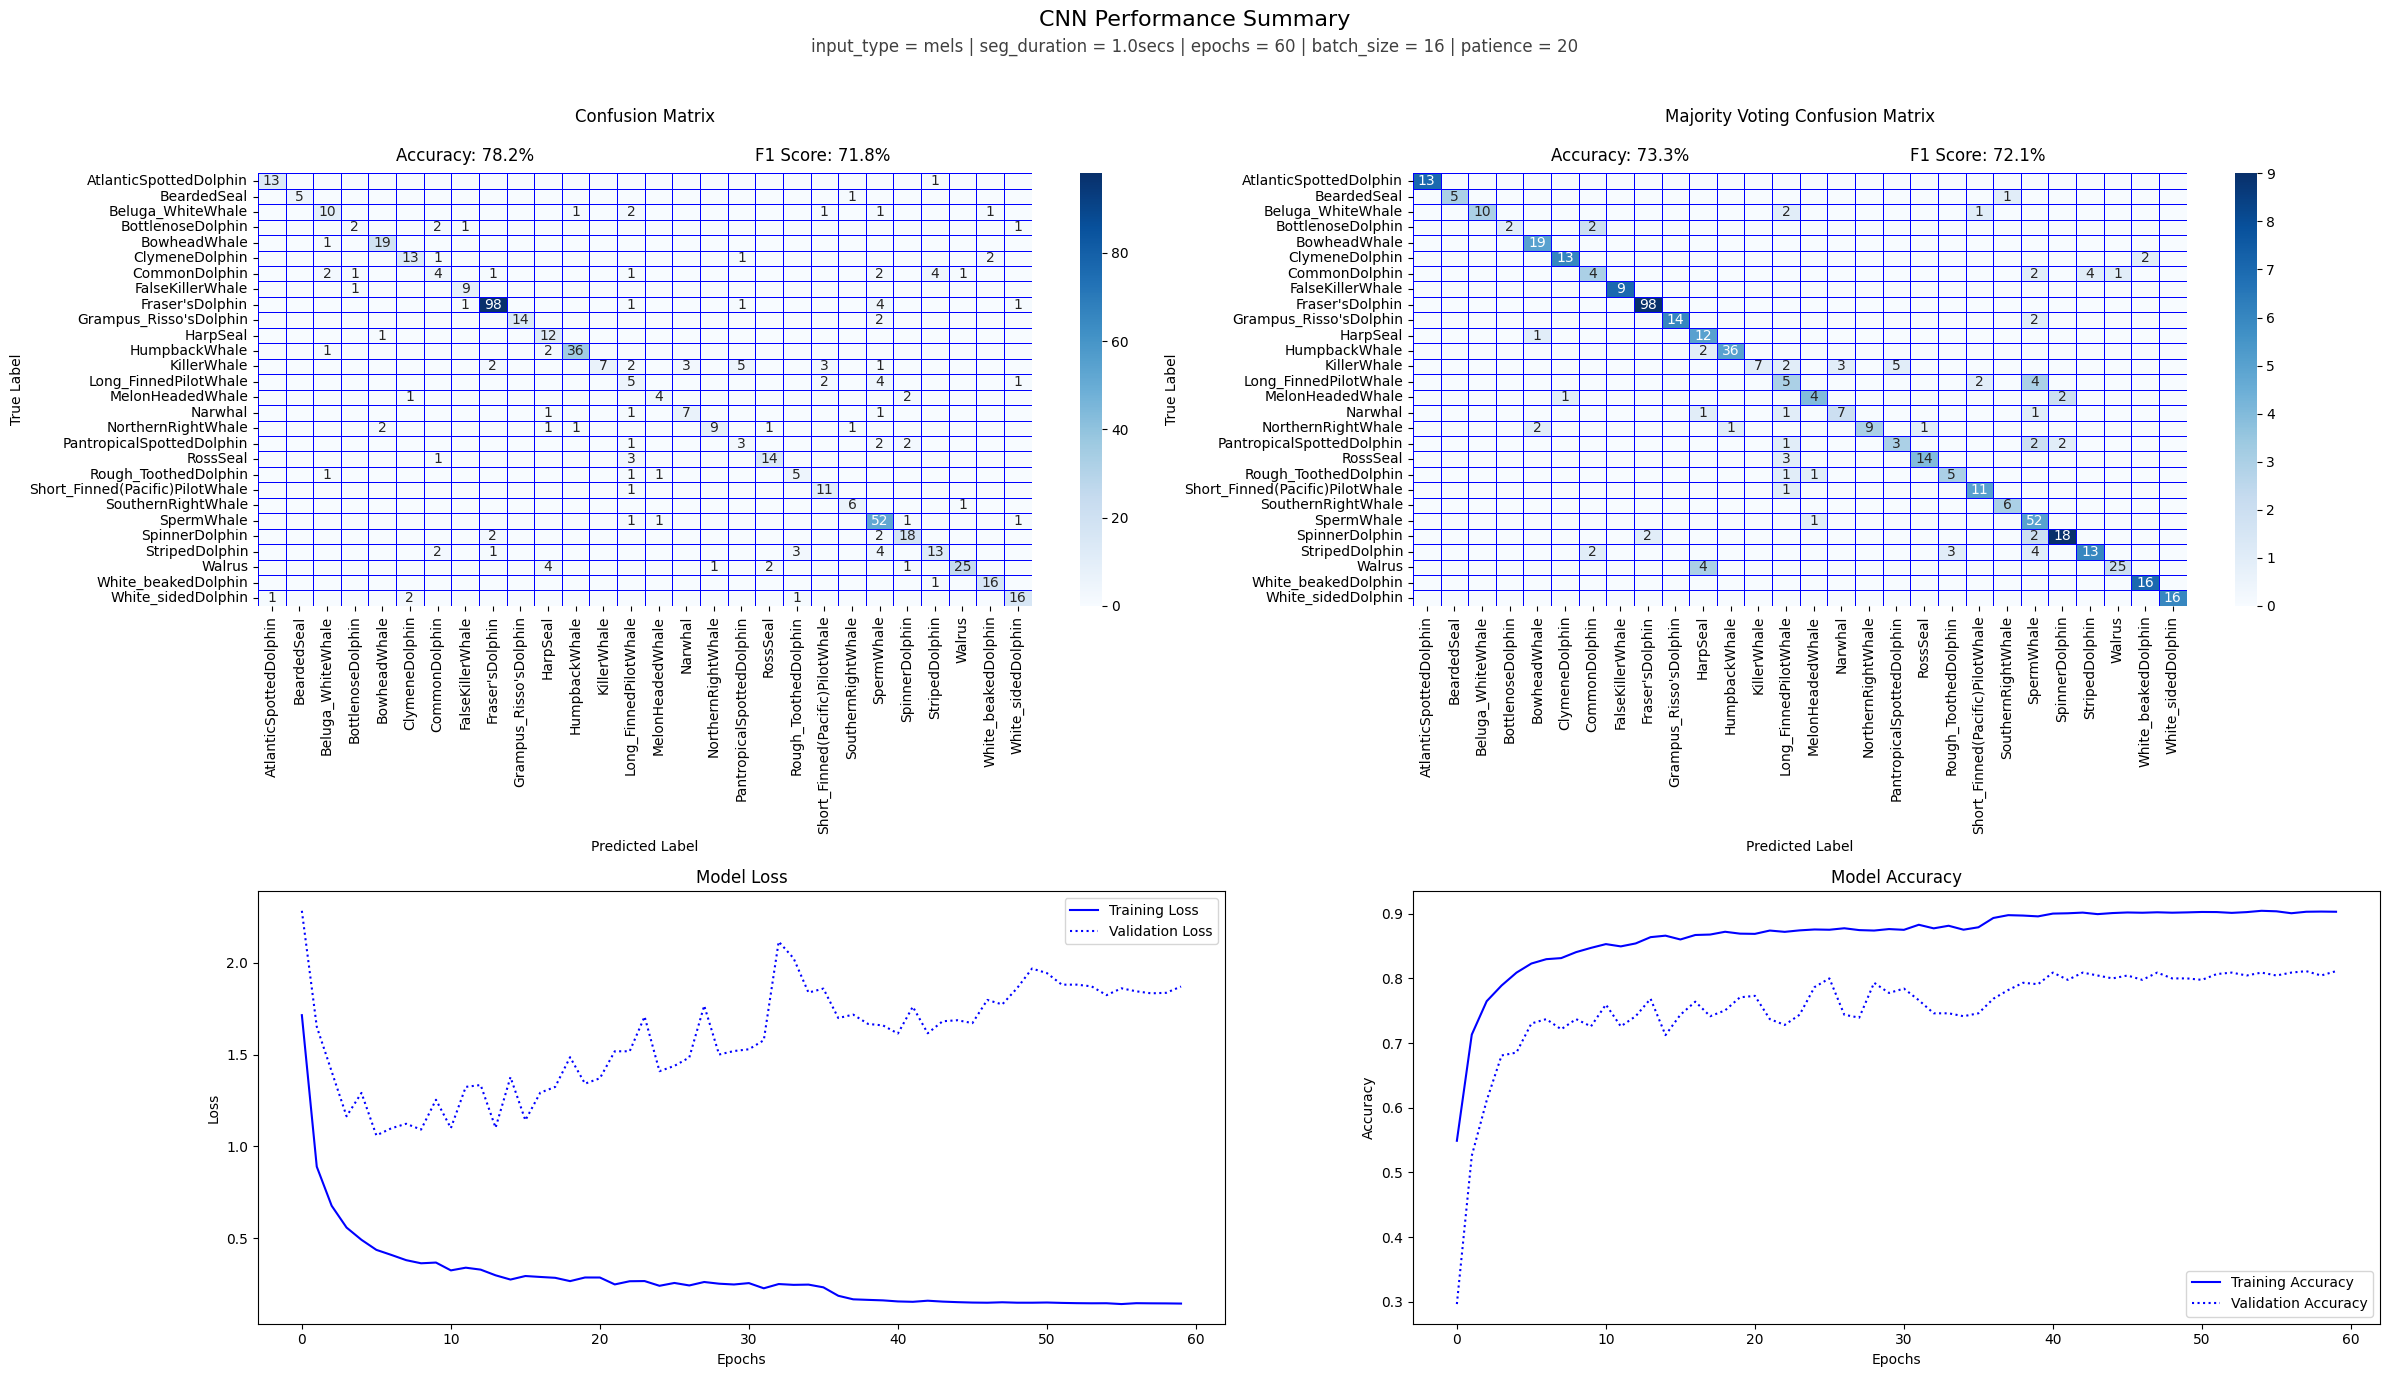

In [ ]:
process_pipeline('mels_1.0_60_16_15', 'mels', '1.0', 60, 16, 20)

Epoch 1/80
469/469 [==============================] - 7s 11ms/step - loss: 2.1832 - accuracy: 0.4923 - val_loss: 2.4636 - val_accuracy: 0.3518 - lr: 0.0010
Epoch 2/80
469/469 [==============================] - 5s 10ms/step - loss: 1.0530 - accuracy: 0.6872 - val_loss: 1.9307 - val_accuracy: 0.4664 - lr: 0.0010
Epoch 3/80
469/469 [==============================] - 4s 9ms/step - loss: 0.7617 - accuracy: 0.7441 - val_loss: 1.6001 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 4/80
469/469 [==============================] - 4s 9ms/step - loss: 0.6042 - accuracy: 0.7776 - val_loss: 1.5771 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 5/80
469/469 [==============================] - 5s 10ms/step - loss: 0.4974 - accuracy: 0.8083 - val_loss: 1.2177 - val_accuracy: 0.6798 - lr: 0.0010
Epoch 6/80
469/469 [==============================] - 4s 9ms/step - loss: 0.4302 - accuracy: 0.8270 - val_loss: 1.2764 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 7/80
469/469 [==============================] - 4s 9ms/step -

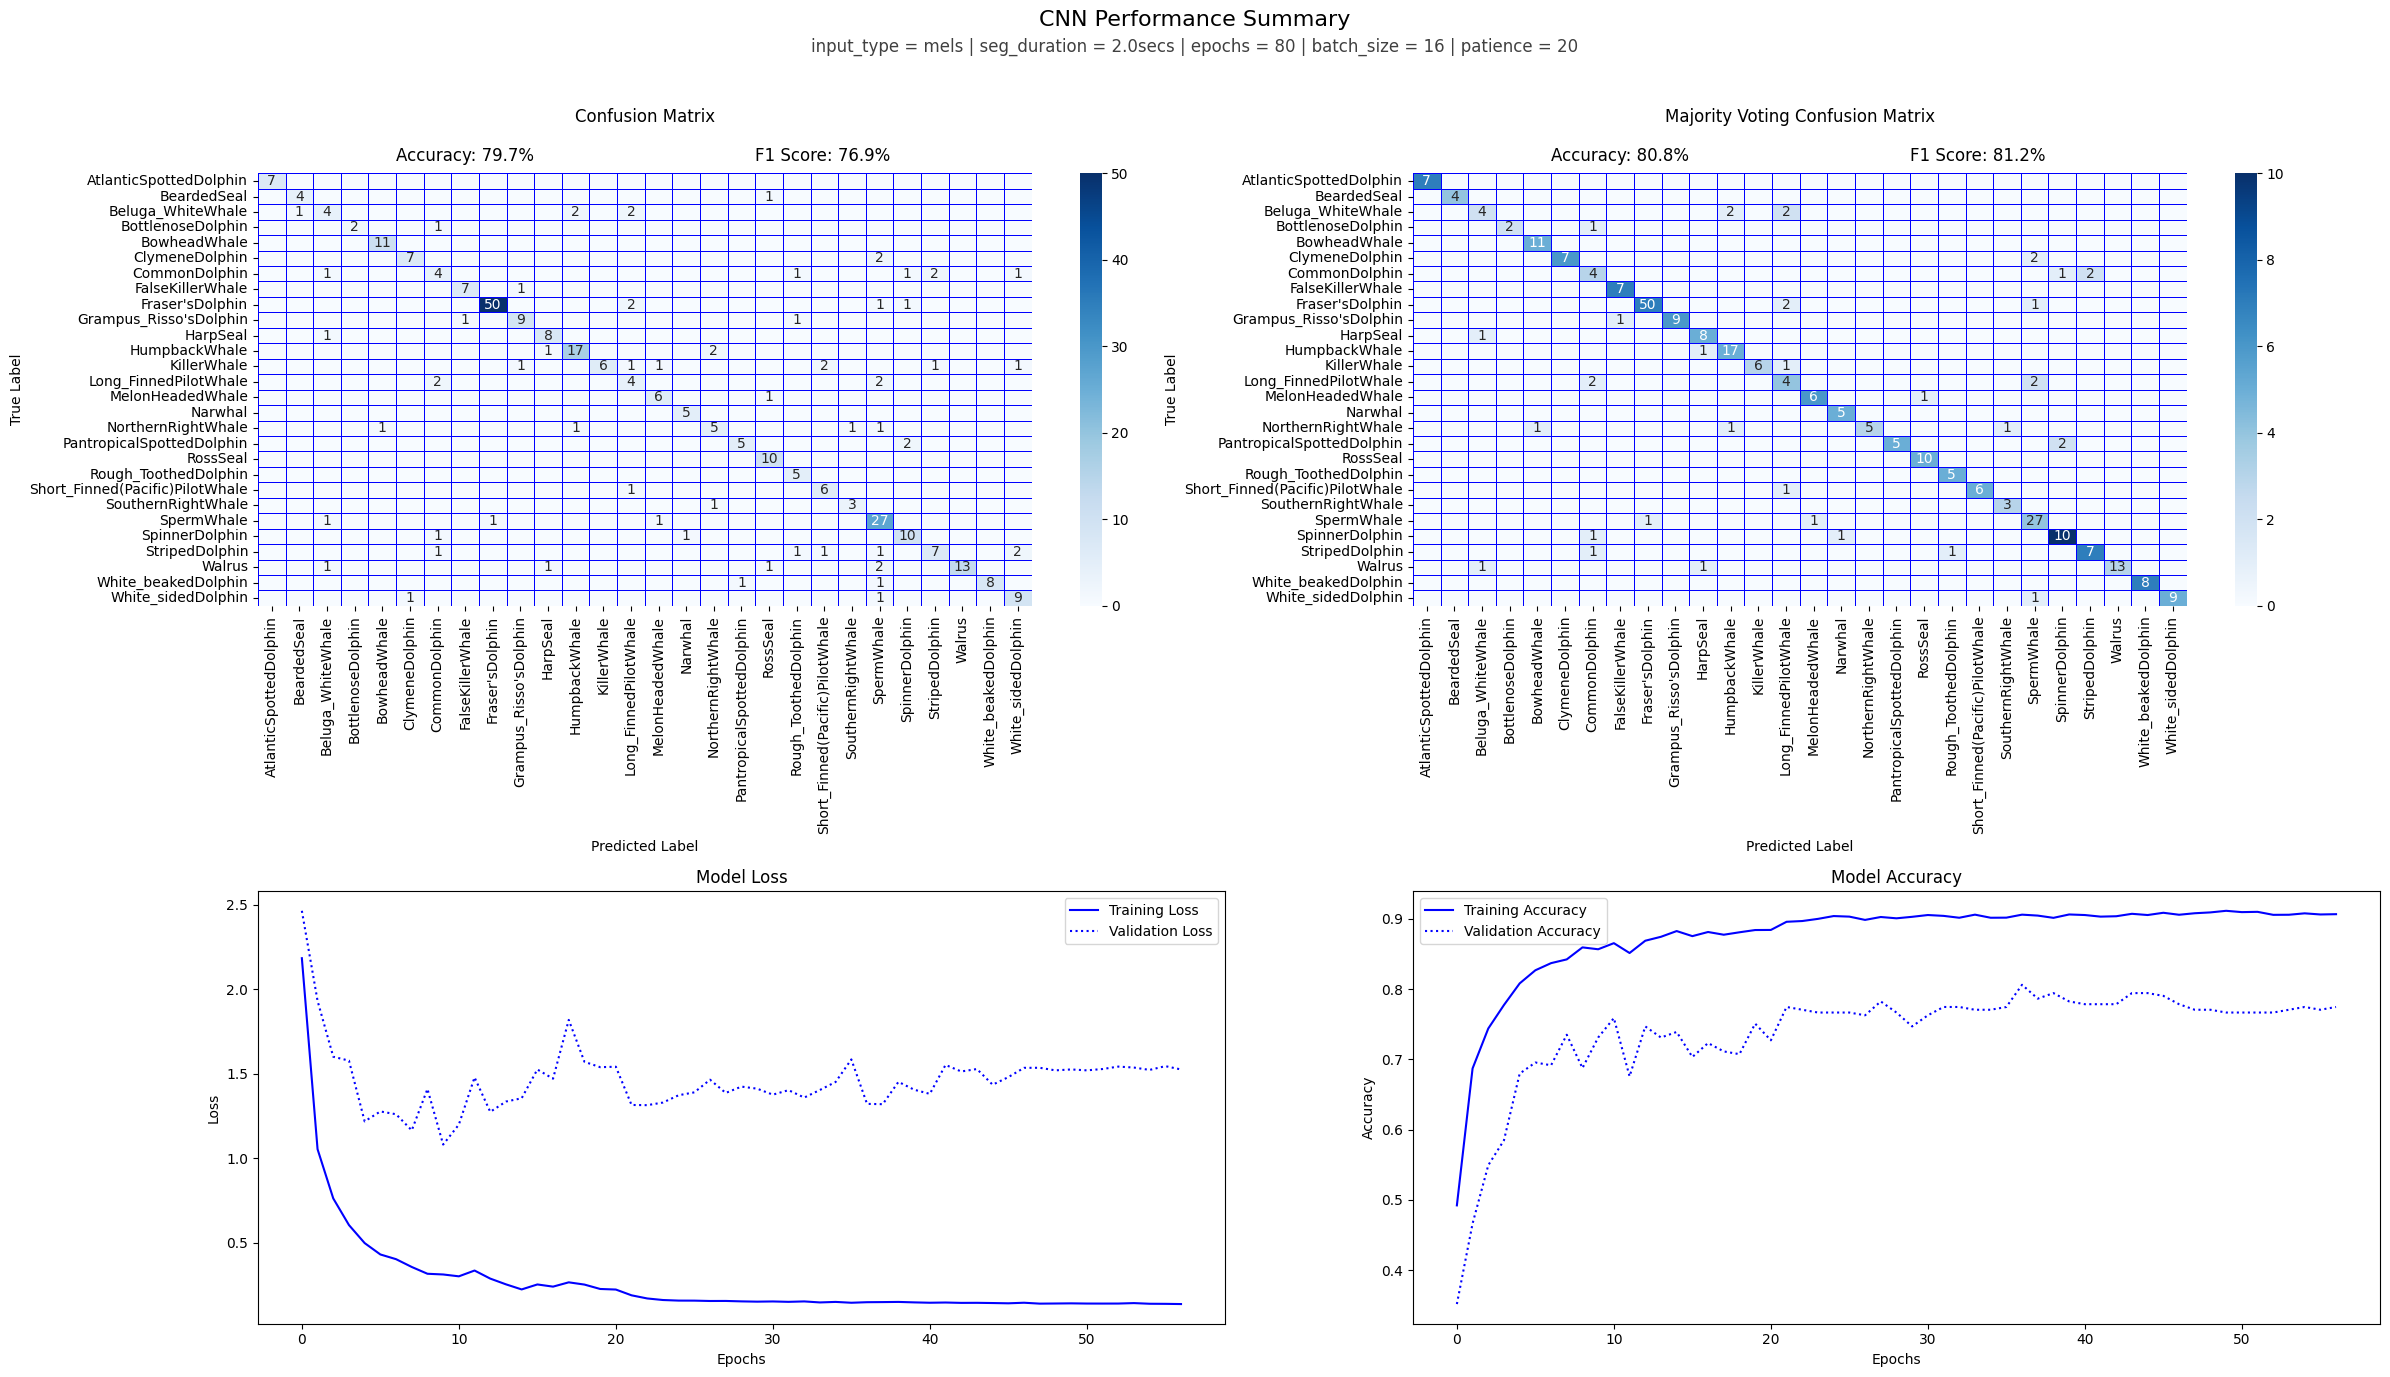

In [ ]:
process_pipeline('mels_2.0_80_16_20', 'mels', '2.0', 80, 16, 20)

Epoch 1/80
235/235 [==============================] - 10s 19ms/step - loss: 2.7354 - accuracy: 0.4263 - val_loss: 3.0772 - val_accuracy: 0.1739 - lr: 0.0010
Epoch 2/80
235/235 [==============================] - 4s 15ms/step - loss: 1.6765 - accuracy: 0.5535 - val_loss: 2.7484 - val_accuracy: 0.2530 - lr: 0.0010
Epoch 3/80
235/235 [==============================] - 3s 15ms/step - loss: 1.2720 - accuracy: 0.6438 - val_loss: 2.3786 - val_accuracy: 0.3439 - lr: 0.0010
Epoch 4/80
235/235 [==============================] - 3s 15ms/step - loss: 1.0221 - accuracy: 0.6850 - val_loss: 1.9215 - val_accuracy: 0.4229 - lr: 0.0010
Epoch 5/80
235/235 [==============================] - 4s 16ms/step - loss: 0.8195 - accuracy: 0.7295 - val_loss: 1.5277 - val_accuracy: 0.5336 - lr: 0.0010
Epoch 6/80
235/235 [==============================] - 3s 15ms/step - loss: 0.7069 - accuracy: 0.7551 - val_loss: 1.5029 - val_accuracy: 0.5415 - lr: 0.0010
Epoch 7/80
235/235 [==============================] - 3s 15ms/s

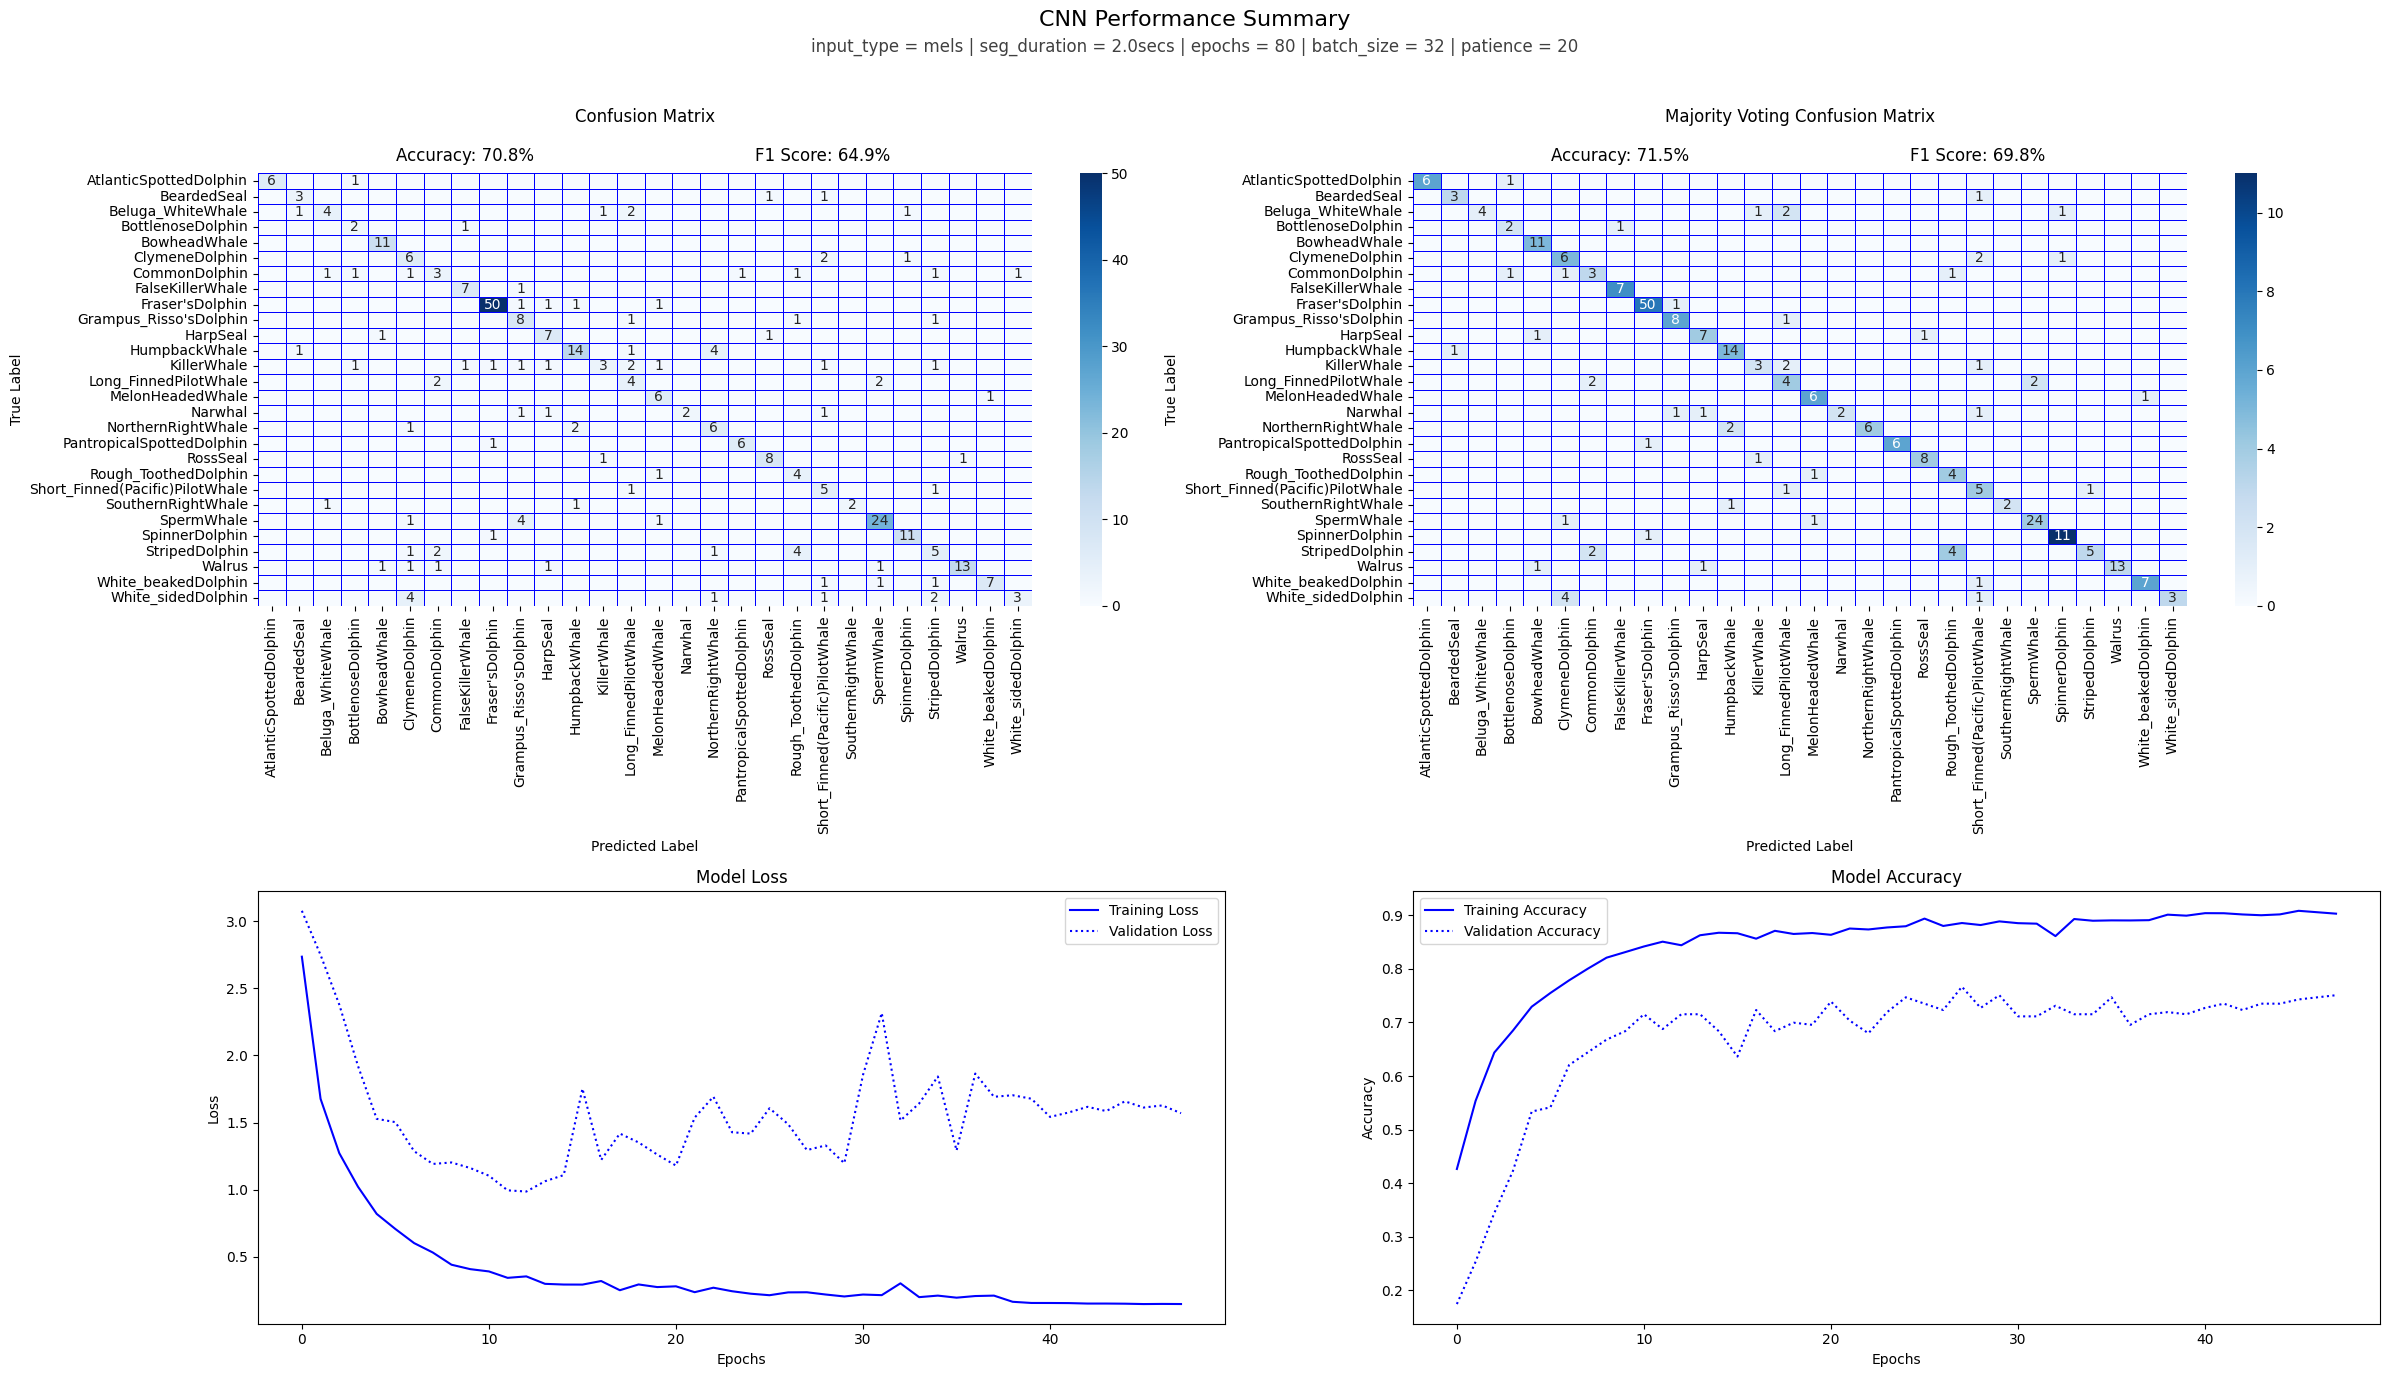

In [ ]:
process_pipeline('mels_2.0_80_32_20', 'mels', '2.0', 80, 32, 20)

Epoch 1/80
223/223 [==============================] - 9s 25ms/step - loss: 4.2108 - accuracy: 0.3142 - val_loss: 3.2062 - val_accuracy: 0.1078 - lr: 0.0010
Epoch 2/80
223/223 [==============================] - 5s 23ms/step - loss: 2.2662 - accuracy: 0.4070 - val_loss: 3.1308 - val_accuracy: 0.1617 - lr: 0.0010
Epoch 3/80
223/223 [==============================] - 5s 23ms/step - loss: 2.0153 - accuracy: 0.4622 - val_loss: 2.9164 - val_accuracy: 0.1976 - lr: 0.0010
Epoch 4/80
223/223 [==============================] - 5s 23ms/step - loss: 1.8223 - accuracy: 0.5062 - val_loss: 2.9344 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 5/80
223/223 [==============================] - 5s 23ms/step - loss: 1.7164 - accuracy: 0.5210 - val_loss: 2.7128 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 6/80
223/223 [==============================] - 5s 22ms/step - loss: 1.5615 - accuracy: 0.5437 - val_loss: 2.6453 - val_accuracy: 0.2814 - lr: 0.0010
Epoch 7/80
223/223 [==============================] - 5s 22ms/st

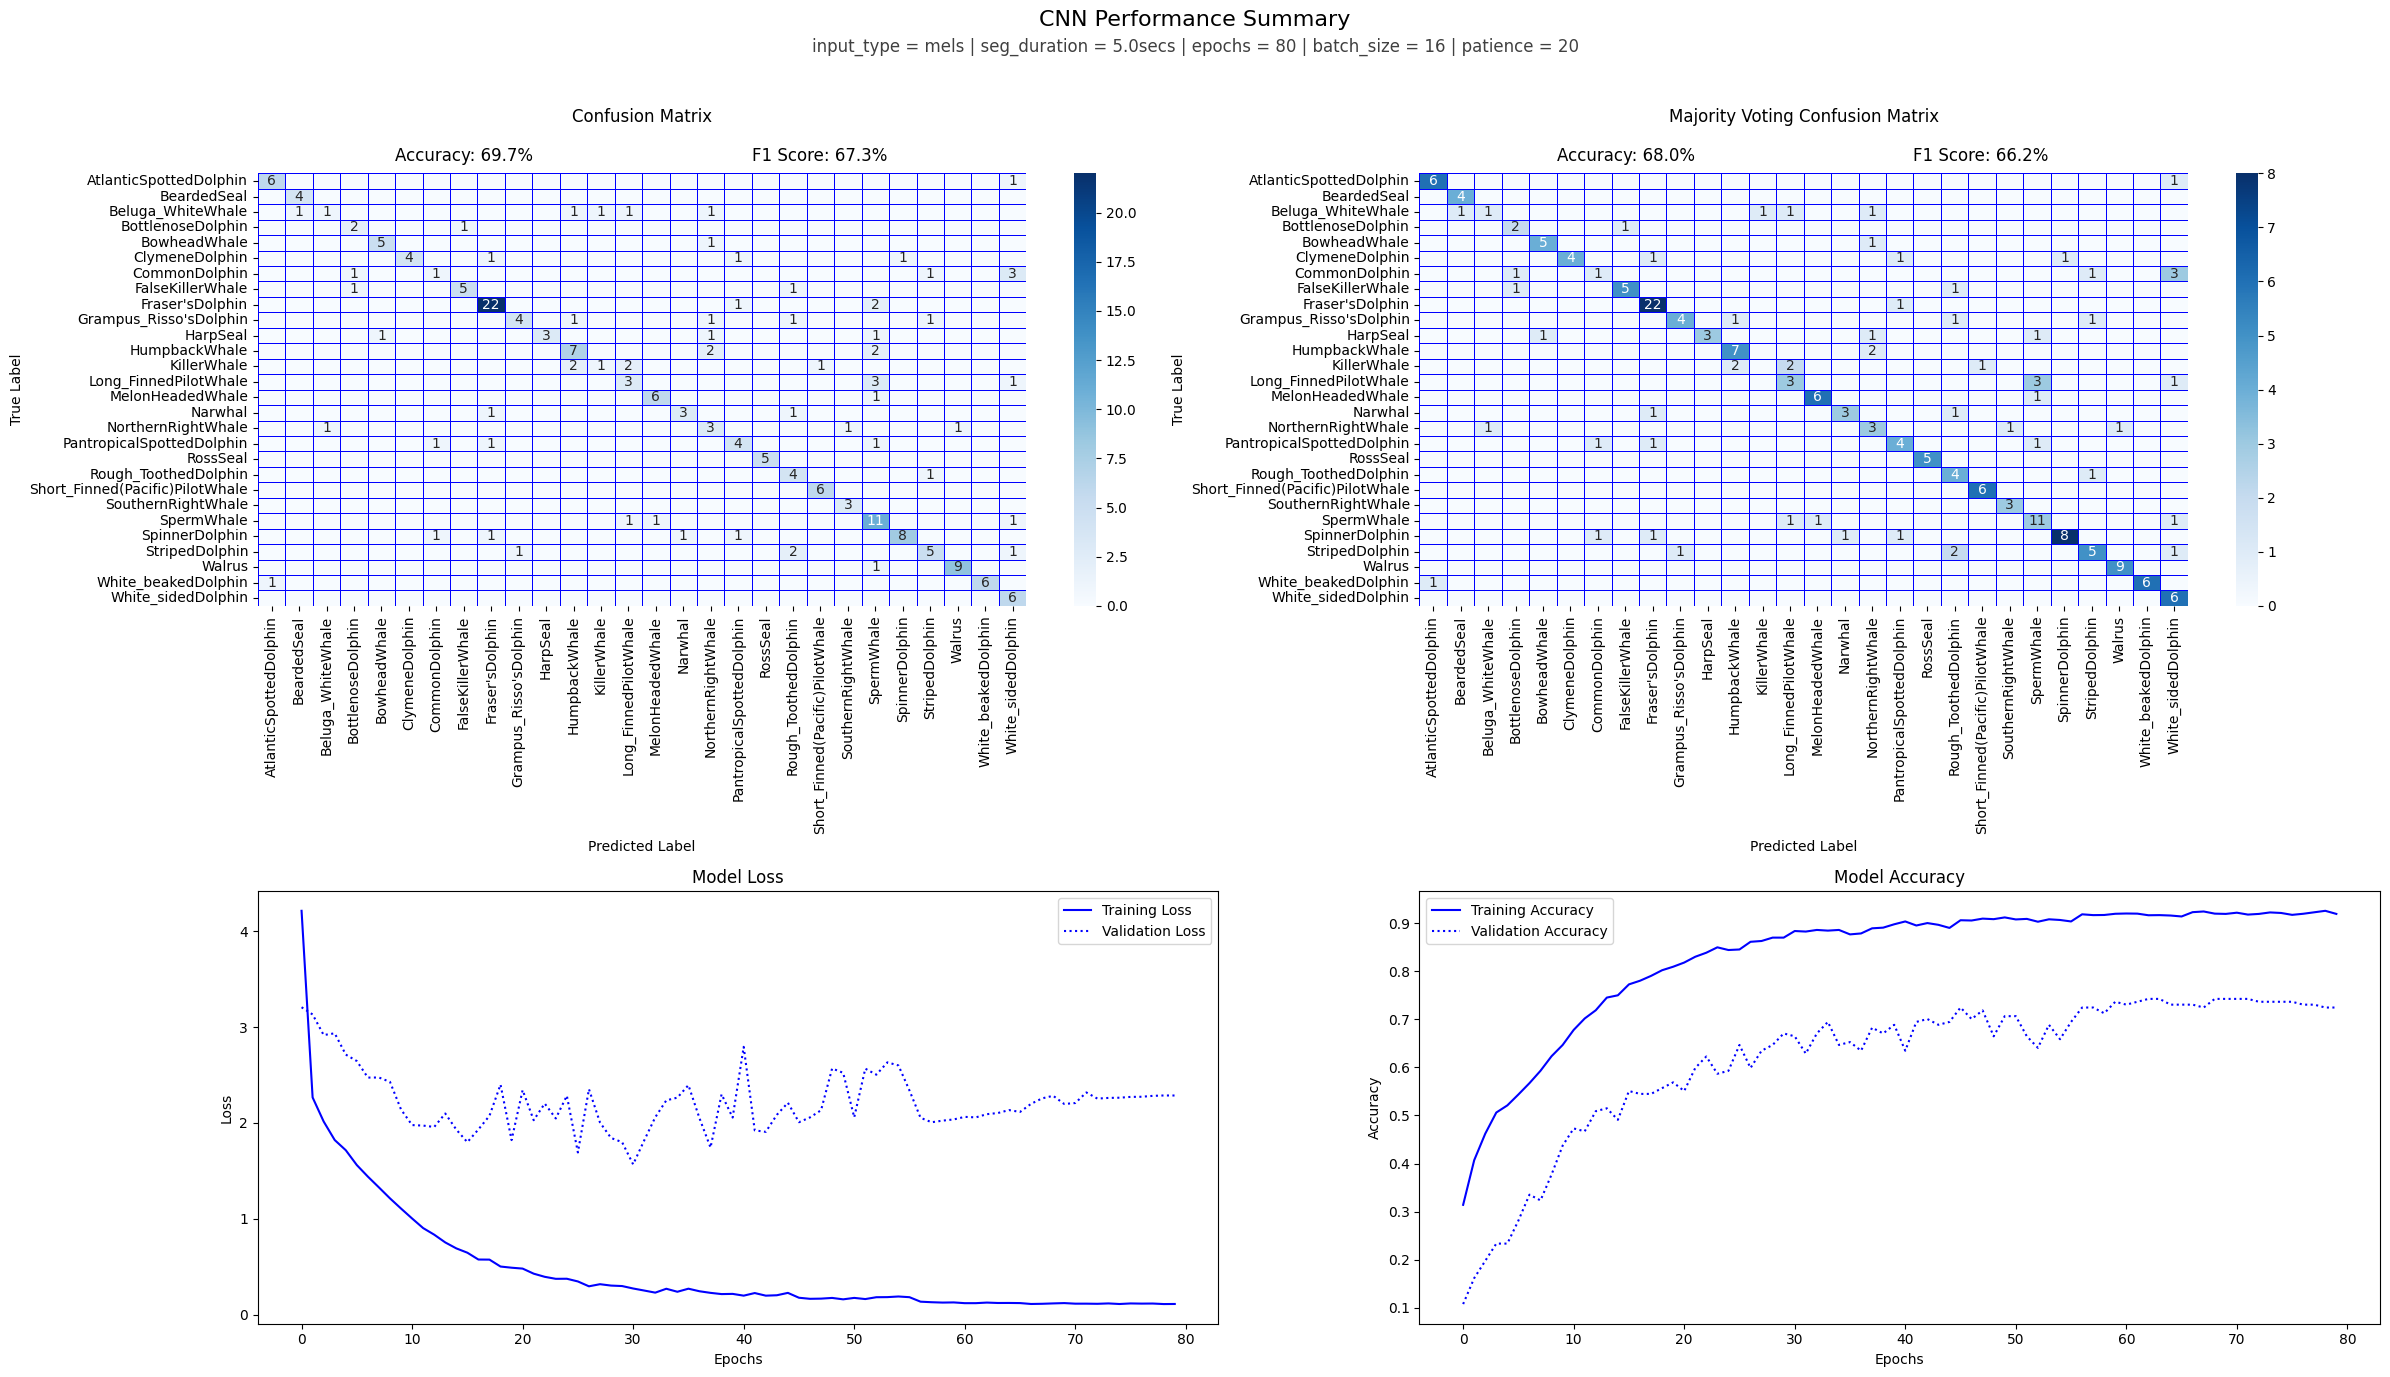

In [ ]:
process_pipeline('mels_5.0_80_16_20', 'mels', '5.0', 80, 16, 20)

Epoch 1/80
112/112 [==============================] - 7s 42ms/step - loss: 6.9450 - accuracy: 0.2951 - val_loss: 3.2295 - val_accuracy: 0.0898 - lr: 0.0010
Epoch 2/80
112/112 [==============================] - 5s 42ms/step - loss: 2.1213 - accuracy: 0.3924 - val_loss: 3.1101 - val_accuracy: 0.1138 - lr: 0.0010
Epoch 3/80
112/112 [==============================] - 4s 40ms/step - loss: 1.8208 - accuracy: 0.4868 - val_loss: 2.6526 - val_accuracy: 0.3054 - lr: 0.0010
Epoch 4/80
112/112 [==============================] - 5s 41ms/step - loss: 1.4466 - accuracy: 0.5732 - val_loss: 2.5169 - val_accuracy: 0.3293 - lr: 0.0010
Epoch 5/80
112/112 [==============================] - 5s 42ms/step - loss: 1.2474 - accuracy: 0.6233 - val_loss: 2.2118 - val_accuracy: 0.4192 - lr: 0.0010
Epoch 6/80
112/112 [==============================] - 4s 40ms/step - loss: 1.0770 - accuracy: 0.6561 - val_loss: 1.8938 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 7/80
112/112 [==============================] - 5s 40ms/st

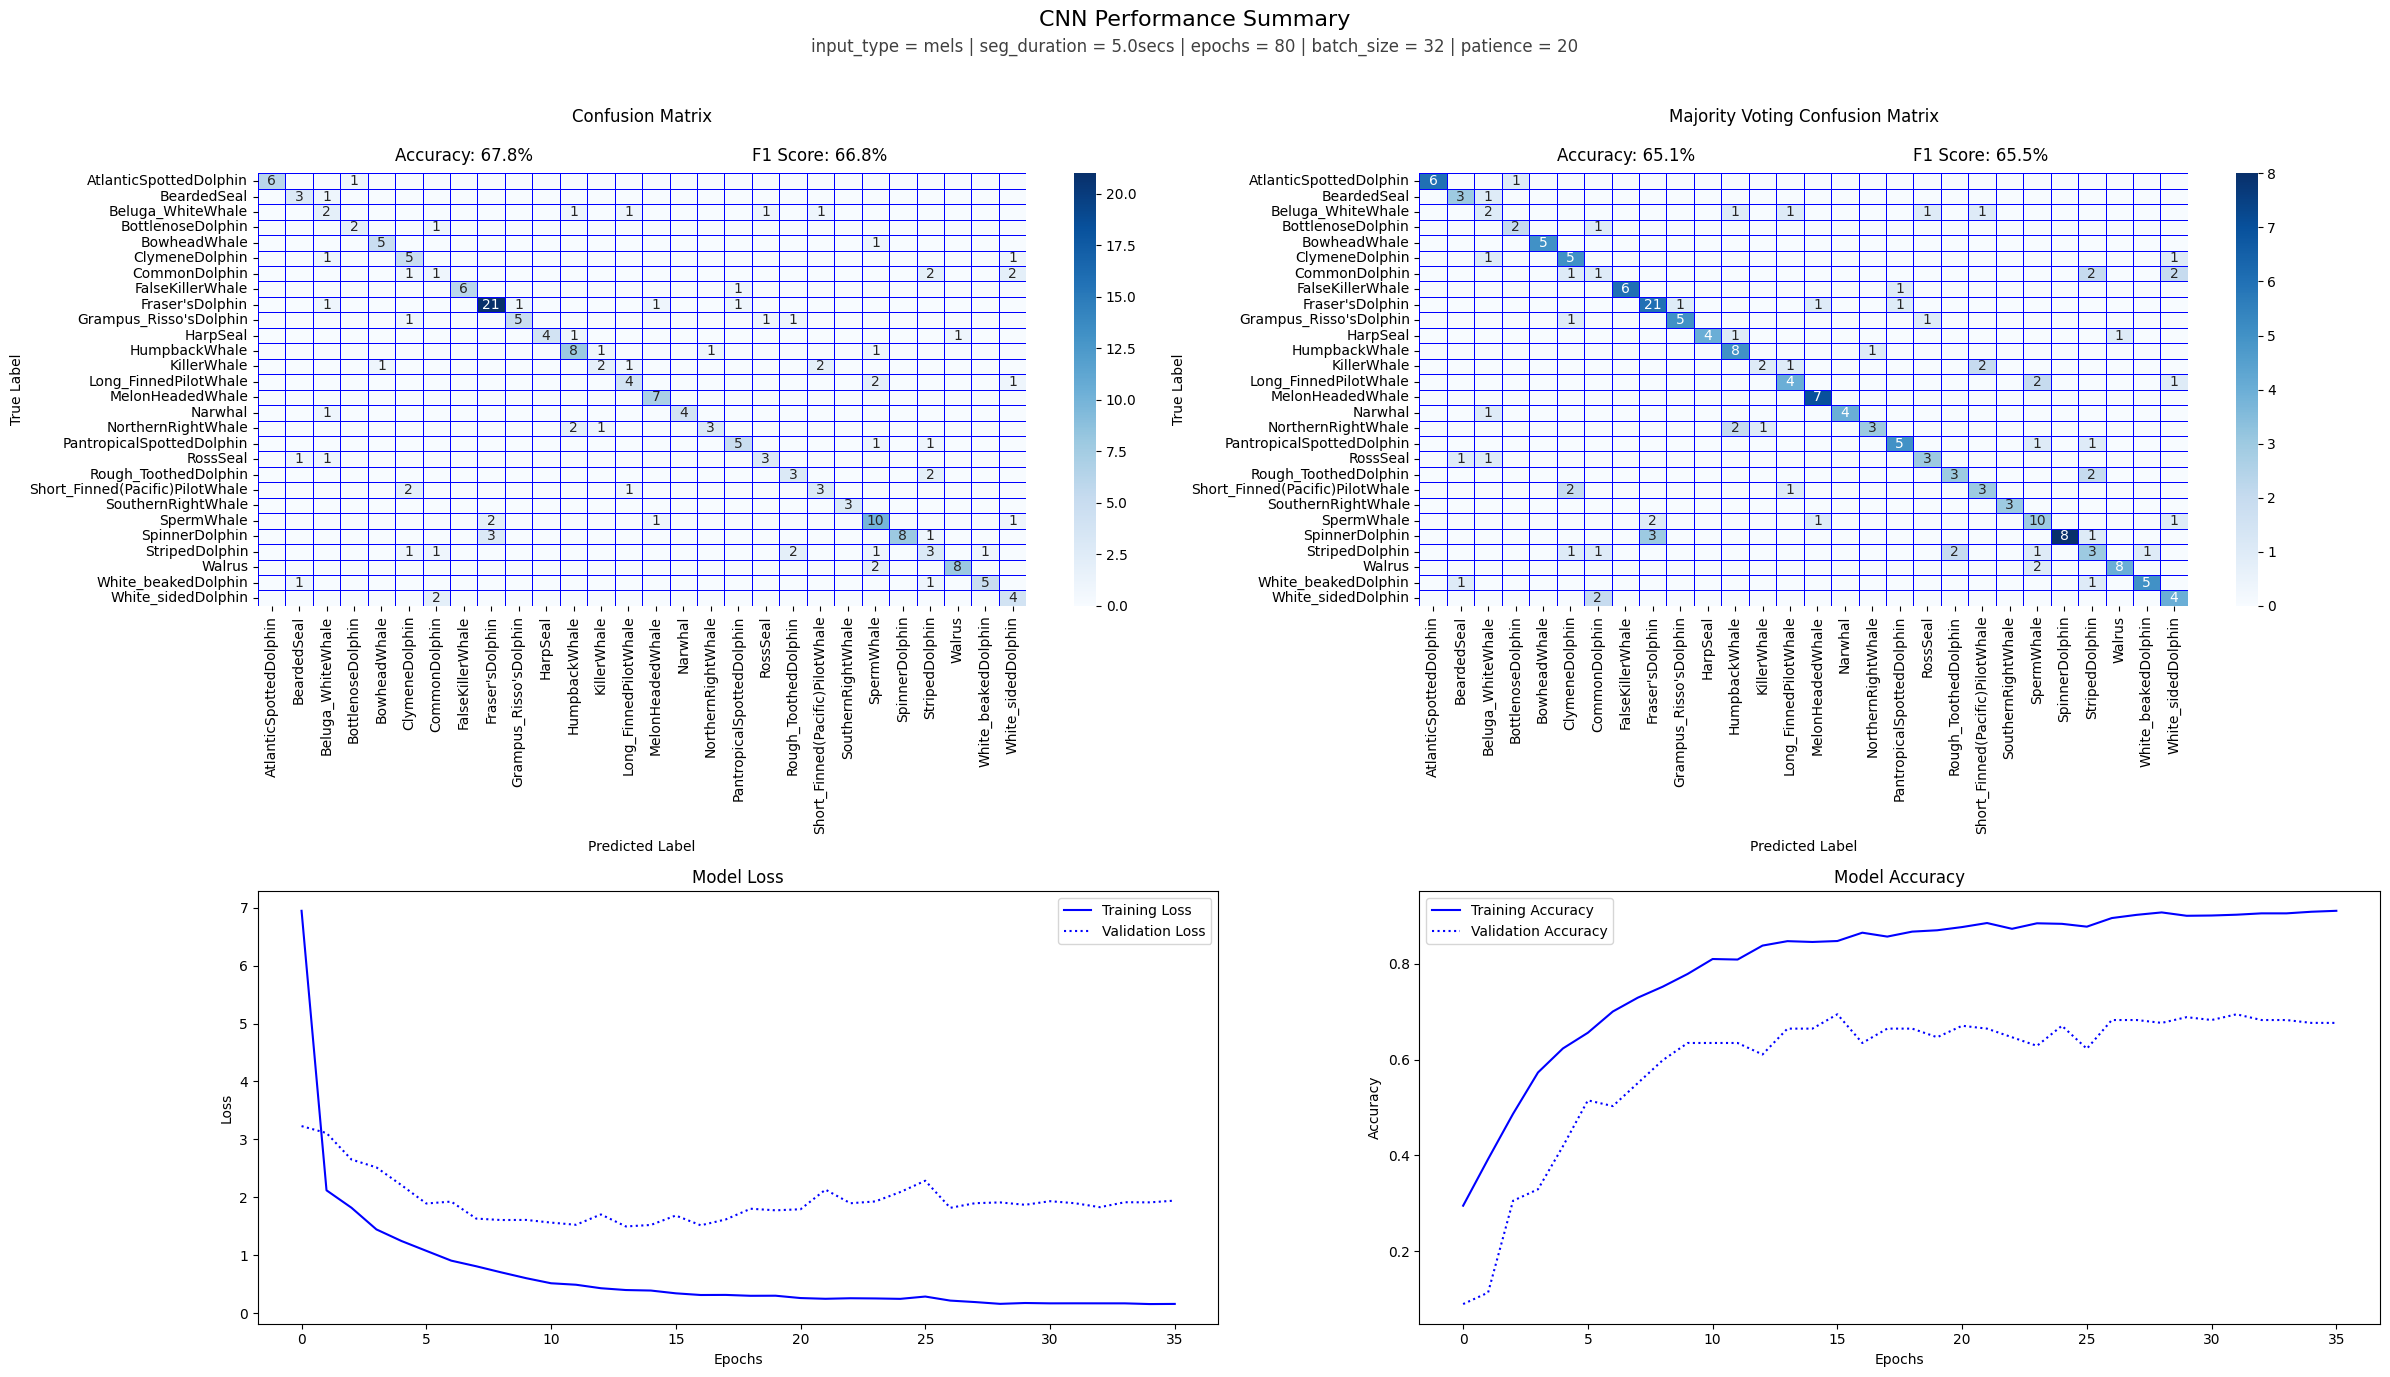

In [ ]:
process_pipeline('mels_5.0_80_32_20', 'mels', '5.0', 80, 32, 20)

Epoch 1/80
469/469 [==============================] - 44s 81ms/step - loss: 6.3662 - accuracy: 0.4099 - val_loss: 3.4615 - val_accuracy: 0.1700 - lr: 0.0010
Epoch 2/80
469/469 [==============================] - 36s 77ms/step - loss: 1.6977 - accuracy: 0.5685 - val_loss: 3.0969 - val_accuracy: 0.1739 - lr: 0.0010
Epoch 3/80
469/469 [==============================] - 36s 76ms/step - loss: 1.4717 - accuracy: 0.5909 - val_loss: 2.9275 - val_accuracy: 0.2332 - lr: 0.0010
Epoch 4/80
469/469 [==============================] - 36s 76ms/step - loss: 1.2481 - accuracy: 0.6371 - val_loss: 2.2931 - val_accuracy: 0.2885 - lr: 0.0010
Epoch 5/80
469/469 [==============================] - 36s 76ms/step - loss: 1.0389 - accuracy: 0.6853 - val_loss: 1.8909 - val_accuracy: 0.4822 - lr: 0.0010
Epoch 6/80
469/469 [==============================] - 35s 75ms/step - loss: 0.8600 - accuracy: 0.7196 - val_loss: 1.7144 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 7/80
469/469 [==============================] - 35s 

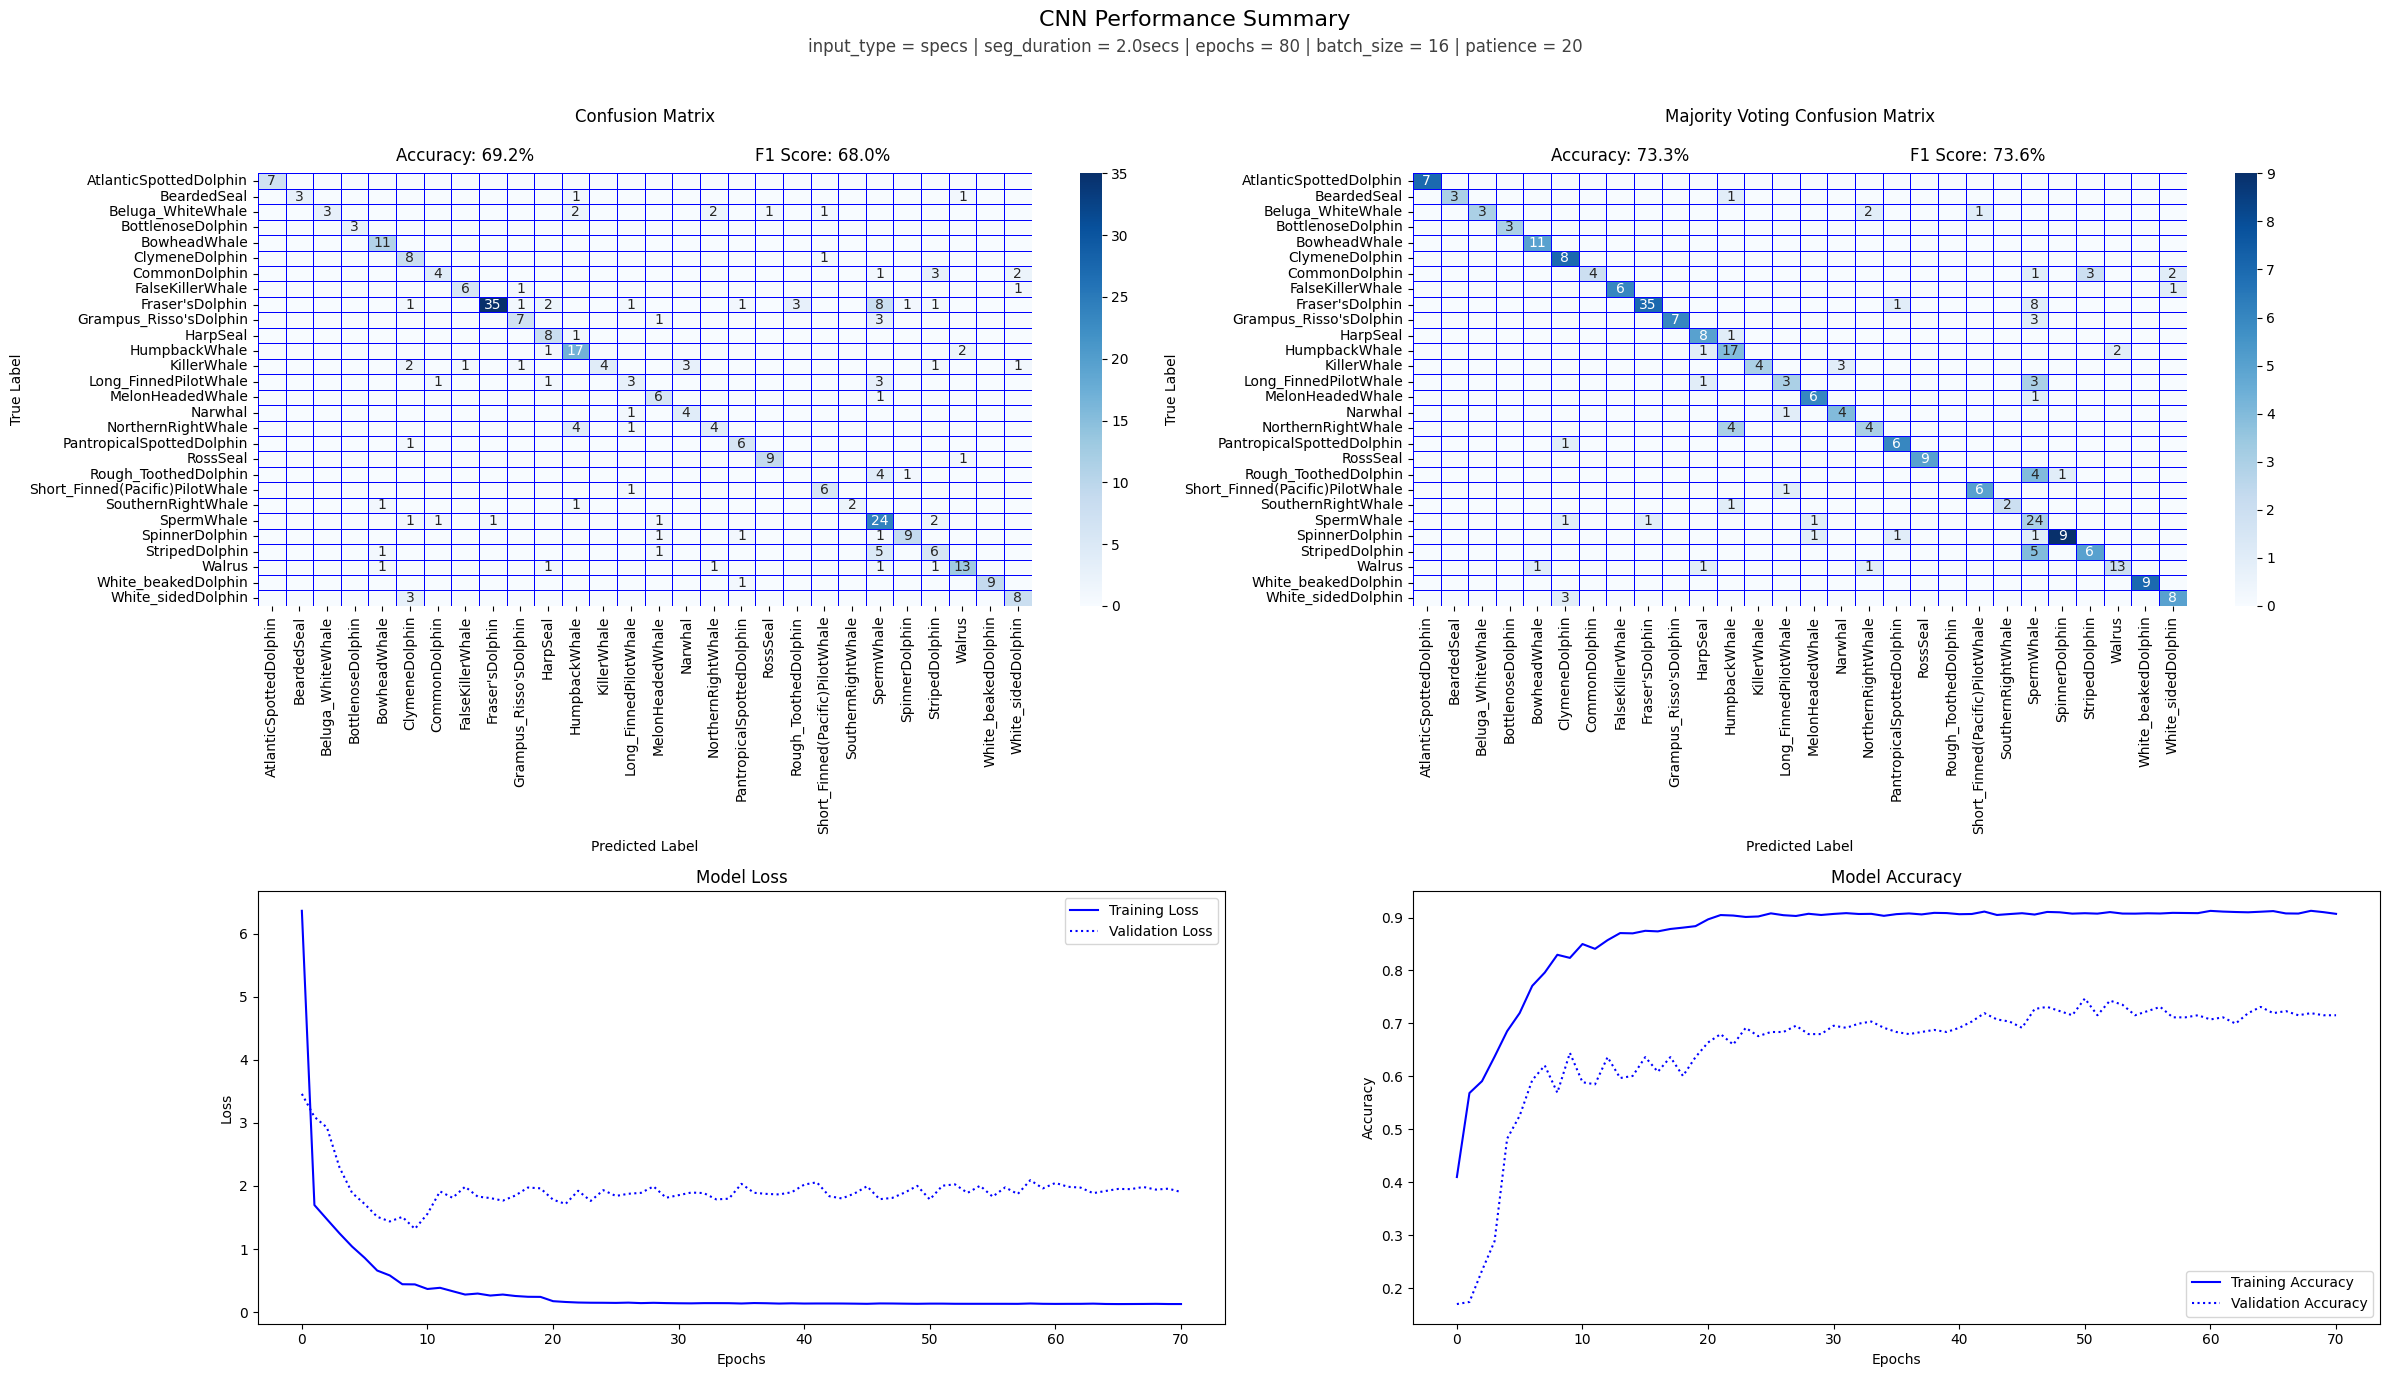

In [ ]:
process_pipeline('specs_2.0_80_16_20', 'specs', '2.0', 80, 16, 20)

Epoch 1/80
469/469 [==============================] - 12s 13ms/step - loss: 1.7910 - accuracy: 0.5105 - val_loss: 2.6003 - val_accuracy: 0.2648 - lr: 0.0010
Epoch 2/80
469/469 [==============================] - 5s 10ms/step - loss: 1.0679 - accuracy: 0.6644 - val_loss: 1.8063 - val_accuracy: 0.4901 - lr: 0.0010
Epoch 3/80
469/469 [==============================] - 5s 10ms/step - loss: 0.7696 - accuracy: 0.7377 - val_loss: 1.4897 - val_accuracy: 0.5889 - lr: 0.0010
Epoch 4/80
469/469 [==============================] - 5s 11ms/step - loss: 0.6112 - accuracy: 0.7686 - val_loss: 1.3305 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 5/80
469/469 [==============================] - 5s 10ms/step - loss: 0.5068 - accuracy: 0.8008 - val_loss: 1.2216 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 6/80
469/469 [==============================] - 5s 10ms/step - loss: 0.4402 - accuracy: 0.8204 - val_loss: 1.1020 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 7/80
469/469 [==============================] - 5s 11ms/s

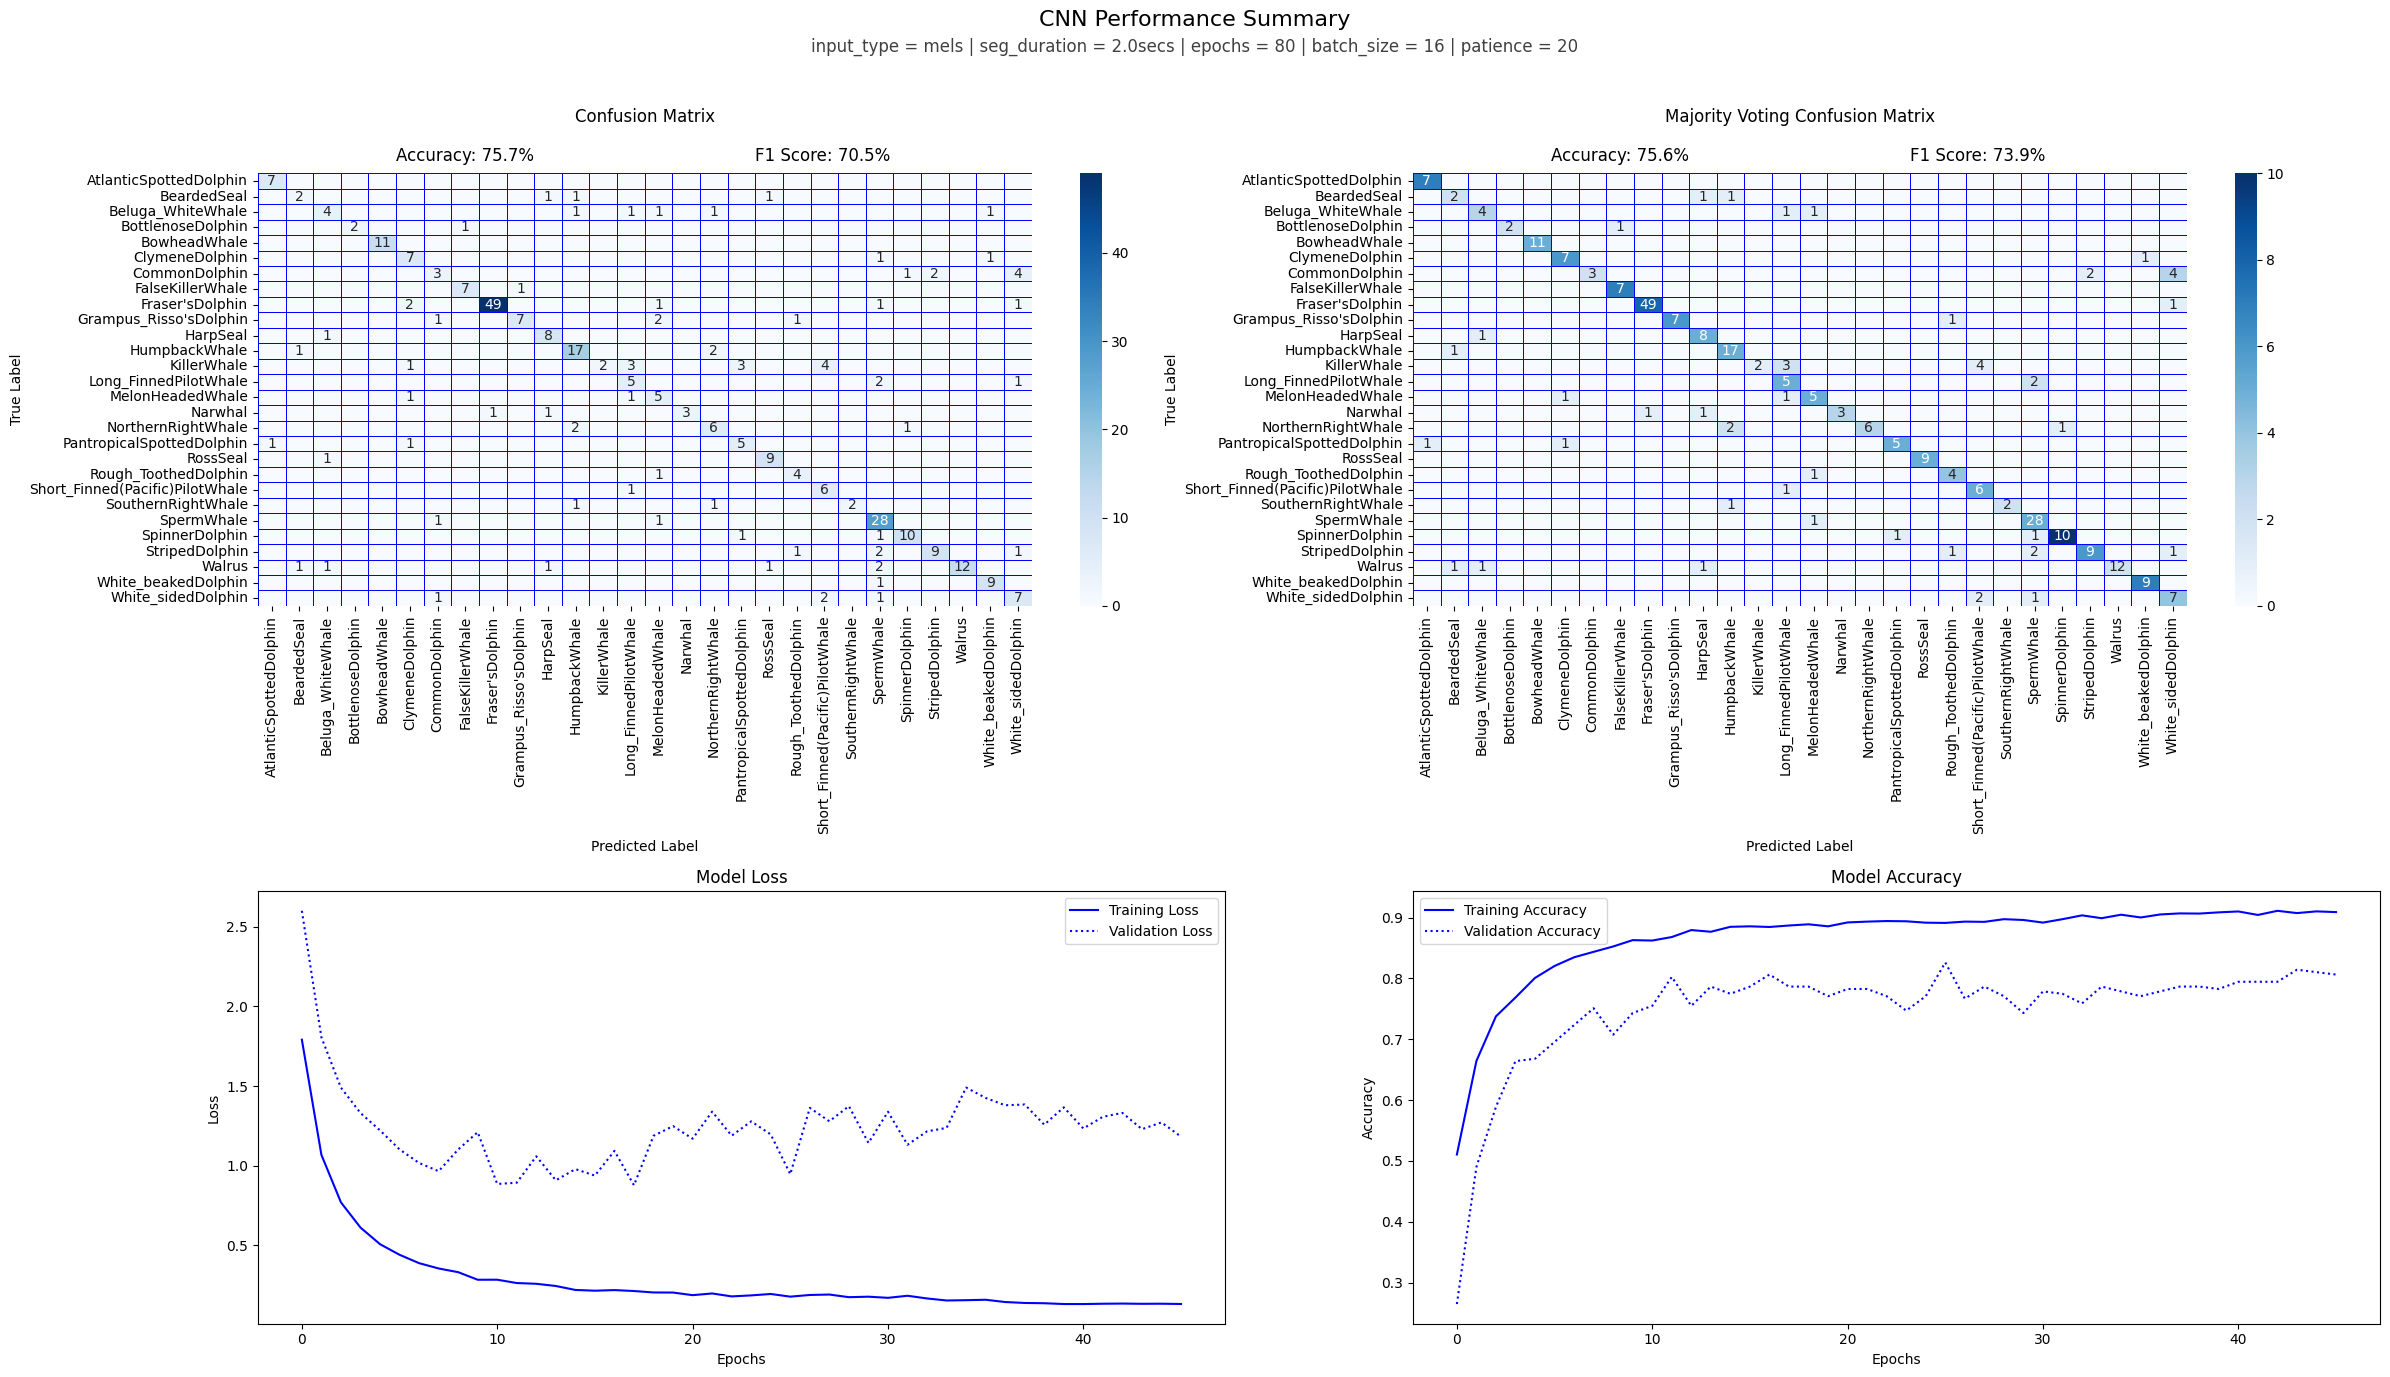

In [ ]:
# This is an attempt with normalization=True and apparently does not improve the optimal accuracy achieved without normalization
process_pipeline('mels_2.0_80_16_20', 'mels', '2.0', 80, 16, 20)